**NAMA: DESY AYURIANTI**

**KELAS/NO: TI 3E/07**

**NIM: 2141720119**

# Import Library

In [ ]:
import tensorflow as tf #import libraru tensorflow
import numpy as np #import numpy untuk operasi numerik
import pandas as pd #import pandas untuk manipulasi data
import matplotlib.pyplot as plt #import modul pyplot untuk visualisasi data
import seaborn as sns #import seaborn untuk keperluan visualisasi data yang high-level
from sklearn.preprocessing import LabelBinarizer #import labelbinarizer untuk konversi label kelas kategorikal menjadi vektor biner
from sklearn.model_selection import train_test_split #untuk membagi dataset menjadi data latih dan data uji
from sklearn.metrics import classification_report #Untuk laporan teks
import zipfile #untuk menyediakan alat untuk bekerja dengan arsip zip

# Load Dataset

## Load MNIST

In [ ]:
from tensorflow.keras.datasets import mnist #import dataset minist

In [ ]:
#Memuat data set dan mmebagi jadi 2 set untuk pelatihan dan pengujian
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
# Check shape data
#train_data.shape -> informasi ukuran data pelatihan
#test_data.shape -> informasi ukuran data pelatihan
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

Penjelasan:

Output -> (jumlah data, tinggi gambar, lebar gambar)

Jadi(60000, 28,28)

60000 -> jumlah data pelatihan,

28 -> tinggi gambar,

28 -> lebar gamabr

In [ ]:
# Check shape labels
#train_labels.shape-> ukuran label pelatihan
#test_labels.shape-> ukuran label pengujian
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

Penjelasan:

(60000)-> ukuran label data pelatihan

(10000)-> ukuran label data pengujian

In [ ]:
# Check each data shape --> should be 28*28
# cek bentuk data gambar pertama (indeks ke-0)
train_data[0].shape

(28, 28)

Penjelasan:

(28, 28)->(tinggi gambar, lebar gambar)

In [ ]:
# Check the label
# cek ukuran label pelatihan
train_labels.shape

(60000,)

### Combine Train and Test Data

In [ ]:
#Menggabungkan data dan label dari set data latih dan data uji jadi satu set data

#Berisi gambar-gambar digit dari kedua set
#np.vstack->untuk melakukan penggabungan secara vertikal anta dua set data(latih dan uji)
digits_data = np.vstack([train_data, test_data])

#Berisi lable digit yang sesuai dgn gambar dlm digits_data
#np.hstack-> untuk melakukan penggabungan secara horizontal
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
# Check data shape
# cek ukuran data (digits_data) setelah dilakukan penggabungan
digits_data.shape

(70000, 28, 28)

Penjelasan:

Ukuran data menjadi 70000 yang didapat dari penjumlahan 60000 data latih dan 10000 data uji

In [ ]:
# Check label shape
# cek ukuran data label (digits_label) setelah dilakukan penggabungan
digits_labels.shape

(70000,)

Penjelasan:

Ukuran data label menjadi 70000 yang didapat dari penjumlahan 60000 label data latih dan 10000 label data uji

Text(0.5, 1.0, 'Class: 9')

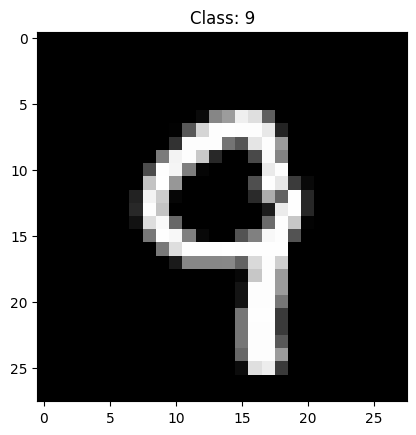

In [ ]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])#buat indeks acak dari 0 sampe jumlah data dari digits_data
plt.imshow(digits_data[idx], cmap='gray')#menampilkan gambar dari hasil indeks acak
plt.title('Class: ' + str(digits_labels[idx]))#mnampilkan judul

<Axes: xlabel='Labels', ylabel='count'>

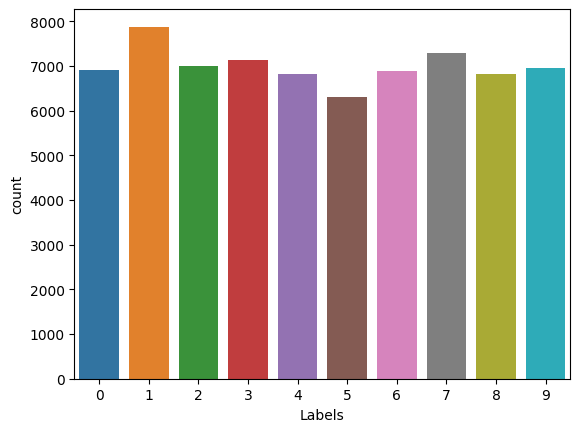

In [ ]:
# Check data distribution

#konversi array digits_labels dan kolom ini dinamai 'Lables'
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])

#Membuat countplot yang menunjukkan frekuensi setiap nilai unik di sumbu x
sns.countplot(df_labels, x='Labels')

Penjelasan:

Dari diagram diatas menunujukkan jumlah nilai unik pada setiap labelnya

## Load Kaggle A-Z

In [ ]:
#unduh zip file
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-11-28 02:08:57--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.2’

alfabeto_A-Z.zip.2  100%[===================>] 184.67M   125MB/s    in 1.5s    

2023-11-28 02:08:59 (125 MB/s) - ‘alfabeto_A-Z.zip.2’ saved [193643888/193643888]



In [ ]:
# Extract zip file

#Membaca isi dari file zip
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')

#Ekstrak isi dari zip file
zip_object.extractall('./')

#tuto objek zip setelah selesai
zip_object.close()

In [ ]:
#membaca file CSV dan mengonversi nilai dalam dataframe jadi float
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

#menampilkan dataset
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pixel data only
#Mmeisahkan data piksel, hapus kolom '0' yang merupakan label
alphabet_data = dataset_az.drop('0', axis=1)

# Get labels only
# memisahkan label, amnil kolom '0'
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape data
#cek kembali bentuk /jumlah data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

Penjelasan:

((372450, 784), (372450,))
Jumlah dataset 372450 dengan 784 pixel. Sleain itu untuk label memiliki 372450 label.

In [ ]:
# Check shape labels
#cek bentuk label
alphabet_labels.shape

(372450,)

Penjelasan:

Jumlah label adalah 372450

In [ ]:
# Reshape pixel data to 28*28
#Ubah pixel gambar jadi 28*28 2dimensi
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
#cek kembali stelah perubahan ukuran pixel
alphabet_data.shape

(372450, 28, 28)

Penjelasan:

Ukuran pixel sudah berhasil terubah menjai 28 x 28 pixel

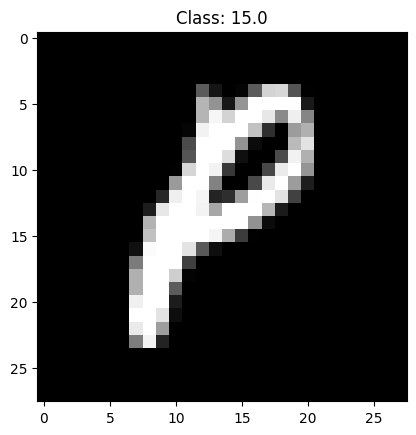

In [ ]:
# Randomly checking A-Z dataset
#buat indeks acak
index = np.random.randint(0, alphabet_data.shape[0])

#menampilkan gambar yang sudah dicek acak
plt.imshow(alphabet_data[index], cmap = 'gray')

#menampilkan judul dengan nama label
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

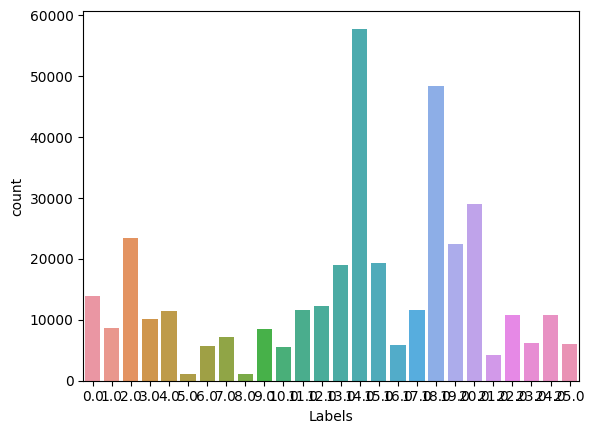

In [ ]:
# Check data distribution

#Mmebuat dataframe baru dari label dataset A-Z
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})

#Membuat counplot untuk menunjukkan sebaran jumlah setiap karakter dataset
sns.countplot(df_az_labels, x='Labels')

Penjelasan:

Diagram tersebut menunujukka frekuensi tiap karakter dalam dataset

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Check unique value from digits_labels
#get nilai unik dari array dari digits-label
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels
#get nilai unik dari array alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

#buat label karakterA-Z dimulai dari nilai 10-35 agar bisa melanjutkan label digit
alphabet_labels += 10

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine both of them
#menggabungkan data A-Z
data = np.vstack([alphabet_data, digits_data])

#menggabungkan label A-Z
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Check the shape
#cek bentuk ukuran data kemabli
data.shape, labels.shape

((442450, 28, 28), (442450,))

Data dan label bertambah menjadi 442450 yang semula jumlahnya 372450

In [ ]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
#menambahkan dimensi baru karen memebutuhkan data 3D
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

Ada angka 1 di belakang output yang menandakan dimensi sudah bertambah menjadi 3Dimensi

# Preprocessing

In [ ]:
# Normalize data
#bagi data dengan 255 untuk konversi nilai pixel menjadi rentang 0-10
data /= 255.0

In [ ]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

Normalisasi berhasil, rentang pixel saat ini sudah antara 0 dan 1

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
#konfersi label kelas menjadi biner
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Check labels shape
labels.shape

(442450, 36)

Penjelasan:

Terdapat 442450 sampel dan direpresentasikan deng panjang vektor 36. (26 untuk karakter A-Z, 10 Kelas untuk digit 0-9)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

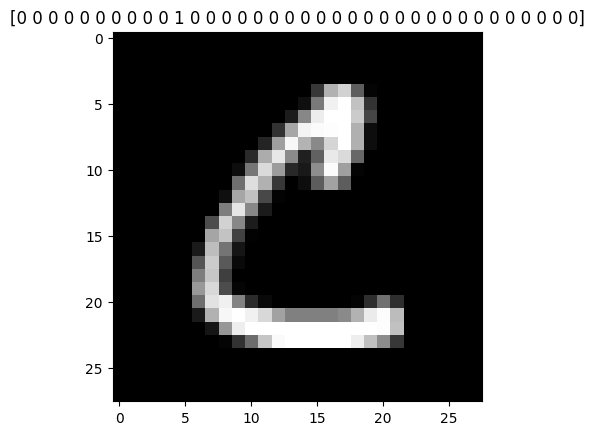

In [ ]:
# Check data with label binarizer's label

#menampilkan gamabr dari indeks 30000
plt.imshow(data[30000].reshape(28,28), cmap='gray')

#Mmeberi judul
plt.title(str(labels[0]))

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
#cek total jumlah masing2 kelas dalam dataset
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
# cek data terbesar
classes_total.max()

57825

In [ ]:
# Create a weight for each data
classes_weights = {}#inisialisasi
for i in range(0, len(classes_total)):#iterasi tiap kelas
  #print(i)
  # invers proporsional dengan jumlah sampel pada kelas tersebut,
  # sehingga kelas dengan lebih sedikit sampel mendapatkan bobot yang lebih tinggi.
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [ ]:
#pisah dataset jadi 20 (uji):80 (pelatihan)
# Argumen stratify digunakan untuk memastikan proporsi kelas yang seimbang di kedua subset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [ ]:
# Import library
#untuk menghasilkan variasi gambar dari dataset asli
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#buat ibjek image datagenerator
augmentation = ImageDataGenerator(rotation_range = 10, #rentang rotasi gambar
                                  zoom_range=0.05,  #rentang zoom
                                  width_shift_range=0.1, #rentang pergeseran lebar gambr
                                  height_shift_range=0.1, #rentang pergeseran tinggi gambar
                                  horizontal_flip = False) #pemutaran horizontal gambar

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential #buat model sequential, terdiri dari bbrpa layers

 #lapisan convolusi untuk proses gambar
 #MaxPool2D untuk pengurangan dimensi
 #Flatten untuk meratakan output jadi satu dimensi
 #dense: lapisan neurak network
 #modelcheck point: callback, simpan model selama pelatihan
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint #

In [ ]:
# Build the network
# Membuat objek Sequential untuk membangun model secara berurutan
network = Sequential()

# Menambahkan lapisan konvolusi pertama
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Menambahkan lapisan pooling untuk mereduksi dimensi
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi kedua
network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))

# Menambahkan lapisan pooling kembali
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi ketiga
network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))

# Menambahkan lapisan pooling kembali
network.add(MaxPool2D(pool_size=(2,2)))

# Meratakan output menjadi vektor satu dimensi
network.add(Flatten())

# Menambahkan lapisan Dense (fully connected)
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# Menambahkan lapisan output dengan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan fungsi kerugian, pengoptimal, dan metrik yang diinginkan
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Output tsb memberikan gambaran umum tentang struktur dan kompleksitas model, serta jumlah parameter yang akan diperbarui selama pelatihan. Model ini memiliki arsitektur dasar CNN dengan tiga lapisan konvolusi dan lapisan-lapisan Dense untuk klasifikasi 36 kelas.

Total Parameters: Menunjukkan jumlah total parameter yang dapat disesuaikan dalam model.

Trainable Parameters: Menunjukkan jumlah parameter yang dapat disesuaikan yang akan diperbarui selama pelatihan.

Non-trainable Parameters: Menunjukkan jumlah parameter yang tidak akan diperbarui selama pelatihan.


In [ ]:
# Create actual labels
#Membuat daftar label yang sesuai dengan kelas-kelas dalam dataset
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' #nama file
epochs = 20
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
#latih model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),# Generator augmented data
                      validation_data = (X_test, y_test),# Data validasi
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs, # Jumlah batch per epoch
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])# Menggunakan ModelCheckpoint untuk menyimpan model terbaik

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2440 - accuracy: 0.8193
Epoch 1: val_loss improved from inf to 0.30835, saving model to custom_ocr.model
2765/2765 [==============================] - 144s 47ms/step - loss: 2.2440 - accuracy: 0.8193 - val_loss: 0.3084 - val_accuracy: 0.8743
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9933 - accuracy: 0.9001
Epoch 2: val_loss improved from 0.30835 to 0.22793, saving model to custom_ocr.model
2765/2765 [==============================] - 129s 47ms/step - loss: 0.9933 - accuracy: 0.9001 - val_loss: 0.2279 - val_accuracy: 0.9058
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8245 - accuracy: 0.9134
Epoch 3: val_loss did not improve from 0.22793
2765/2765 [==============================] - 131s 47ms/step - loss: 0.8244 - accuracy: 0.9134 - val_loss: 0.3106 - val_accuracy: 0.8836
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7373 - accu

Dari proses pelatuhan dengan 20 epoch, maka dapat dilhat bahwa nilai kurasi data tiap iterasi makin naik

# Evaluate Model

## Make a Single Prediction

In [ ]:
# make a prediction
#Membuat prediksi menggunakan model pada dataset pengujian
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([9.1397525e-20, 6.2154251e-09, 7.0383990e-11, 5.2908920e-13,
       8.1422374e-13, 6.8091182e-09, 3.6579067e-15, 3.0088970e-10,
       6.7687295e-13, 4.0390729e-13, 9.7782852e-14, 6.3030874e-13,
       1.8873323e-09, 8.7783669e-10, 1.2962623e-10, 9.2603543e-09,
       2.4665706e-08, 6.2143251e-12, 9.9983680e-01, 1.5697032e-04,
       5.3599755e-12, 2.2818055e-08, 1.9592653e-16, 5.0182074e-14,
       8.1292145e-10, 9.0604287e-13, 2.8274036e-19, 1.3934520e-15,
       7.4684807e-11, 6.0308907e-06, 5.9869741e-11, 1.2147427e-13,
       3.6698309e-14, 1.9713057e-12, 1.5676167e-09, 6.7268537e-08],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
#mengembalikan indeks kelas dengan nilai probabilitas tertinggi
np.argmax(predictions[1])

18

In [ ]:
# Check label for 24
#cek label indeks 18
name_labels[18]

'I'

In [ ]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[1])

18

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [ ]:
# Evaluate on test data
# Mengevaluasi model pada dataset pengujia
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 4ms/step - loss: 0.1905 - accuracy: 0.9130


[0.19048723578453064, 0.9130297303199768]

In [ ]:
# Print Classification Report
#print report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.19      0.88      0.31      1381
           1       0.98      0.99      0.98      1575
           2       0.87      0.98      0.93      1398
           3       0.95      0.99      0.97      1428
           4       0.85      0.97      0.91      1365
           5       0.70      0.93      0.80      1263
           6       0.96      0.97      0.96      1375
           7       0.96      0.99      0.97      1459
           8       0.97      0.97      0.97      1365
           9       0.95      0.99      0.97      1392
           A       1.00      0.98      0.99      2774
           B       0.99      0.97      0.98      1734
           C       0.99      0.98      0.99      4682
           D       0.85      0.98      0.91      2027
           E       0.98      0.99      0.99      2288
           F       0.95      1.00      0.97       233
           G       0.97      0.94      0.95      1152
           H       0.97    

Dari report klasifikasi tersebut, maka dapat diketahui bahwa acuracy bernilai 91%

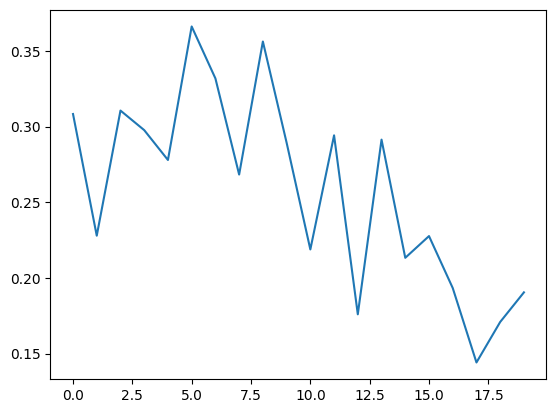

In [ ]:
# Visualize loss value for each epoch
# Membuat plot nilai fungsi kerugian pada data validasi
plt.plot(history.history['val_loss'])

Dari grafik tersebut dapat dilihat bahwa nilai fungsi kerugian pada data validasi lebih kecil dari pada akhir pelatihan dibandingkan awal, yang dapat diartikan bahwa model berhasil belajar dan menuingkatkan kinerjanya.

In [ ]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

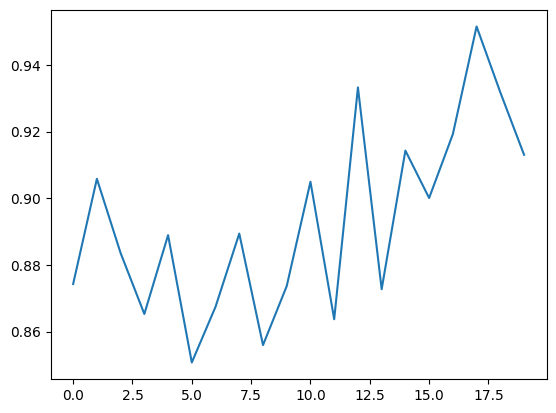

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

Dari grafik tersebut menunjukkan bahwa akurasi meningkat seiring waktu,dan menunjukkan model berhasil belajar dan meningkatkan kinerjanya pada data validasi.

# Save The Model

In [ ]:
# The result will show in colab directory
# simpan seluruh model ke dalam sebuah file
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [ ]:
# Import library
from tensorflow.keras.models import load_model

In [ ]:
# Load saved network
load_network = load_model('network')

In [ ]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

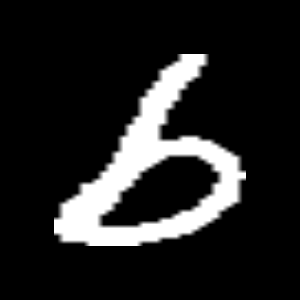

In [ ]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [ ]:
# Check shape
img.shape

(300, 300, 3)

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

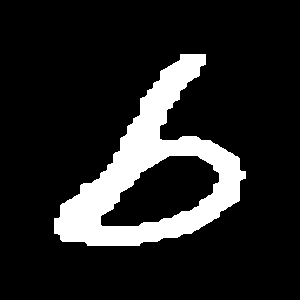

120.0


In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [ ]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 1s 623ms/step


6

In [ ]:
# check label for 6
name_labels[6]

'6'

**Kesimpulan**


Kode Program diatas adalah melakukan pengolahan data dan pembuatan model CNN dengan menggabungkan dataset MNIST dan Kaggle A-Z. Model CNN kemudian dilatih, dievaluasi dan disimpan untuk bisa digunakan untuk pengguanaan selanjutnya. Hasil dari model ini diujikan pada gambar diluar dari gambar yang ada pada dataset.

Selanjutnya model CNN digunakan untuk menguji gambar b_small.jpg dan menghasilkan nilai prediksi 6 sesuai dengan label ke-6 dalam daftar name_labels yang merupakan huruf G.

